## Work
1. 請將 Epoch 加到 500 個，並觀察 learning curve 的走勢
2. 請將 Optimizer 換成 SGD，並觀察 learning curve 的走勢

In [1]:
import os
import keras

# 本作業可以不需使用 GPU, 將 GPU 設定為 "無" (若有 GPU 且想開啟，可設為 "0")
os.environ["CUDA_VISIBLE_DEVICES"] = ""

In [2]:
# 從 Keras 的內建功能中，取得 train 與 test 資料集
train, test = keras.datasets.cifar10.load_data()

In [3]:
# 將 X 與 Y 獨立放進變數
x_train, y_train = train
x_test, y_test = test
# 資料前處理 - 標準化
x_train = x_train / 255.
x_test = x_test / 255.

# 將資料從圖形 (RGB) 轉為向量 (Single Vector)
x_train = x_train.reshape((len(x_train), -1))
x_test = x_test.reshape((len(x_test), -1))

# 將目標轉為 one-hot encoding
y_train = keras.utils.to_categorical(y_train, num_classes=10)
y_test = keras.utils.to_categorical(y_test, num_classes=10)

In [4]:
def build_mlp():
    input_layer = keras.layers.Input([x_train.shape[-1]])
    x = keras.layers.Dense(units=512, activation="relu")(input_layer)
    x = keras.layers.Dense(units=256, activation="relu")(x)
    x = keras.layers.Dense(units=128, activation="relu")(x)
    out = keras.layers.Dense(units=10, activation="softmax")(x)
    
    model = keras.models.Model(inputs=[input_layer], outputs=[out])
    return model
model = build_mlp()

In [5]:
model.summary()

optimizer = keras.optimizers.SGD(lr=0.001)
model.compile(loss="categorical_crossentropy", metrics=["accuracy"], optimizer=optimizer)

Model: "functional_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 3072)]            0         
_________________________________________________________________
dense (Dense)                (None, 512)               1573376   
_________________________________________________________________
dense_1 (Dense)              (None, 256)               131328    
_________________________________________________________________
dense_2 (Dense)              (None, 128)               32896     
_________________________________________________________________
dense_3 (Dense)              (None, 10)                1290      
Total params: 1,738,890
Trainable params: 1,738,890
Non-trainable params: 0
_________________________________________________________________


In [6]:
"""
設定要訓練的 Epoch 數
"""
model.fit(x_train, y_train, 
          epochs=500, 
          batch_size=256, 
          validation_data=(x_test, y_test), 
          shuffle=True)

Epoch 1/500
196/196 [==============================] - 8s 41ms/step - loss: 2.2539 - accuracy: 0.1708 - val_loss: 2.1962 - val_accuracy: 0.2072
Epoch 2/500
196/196 [==============================] - 5s 28ms/step - loss: 2.1632 - accuracy: 0.2144 - val_loss: 2.1286 - val_accuracy: 0.2426
Epoch 3/500
196/196 [==============================] - 7s 35ms/step - loss: 2.1047 - accuracy: 0.2468 - val_loss: 2.0796 - val_accuracy: 0.2653
Epoch 4/500
196/196 [==============================] - 6s 29ms/step - loss: 2.0612 - accuracy: 0.2700 - val_loss: 2.0415 - val_accuracy: 0.2806
Epoch 5/500
196/196 [==============================] - 6s 28ms/step - loss: 2.0263 - accuracy: 0.2856 - val_loss: 2.0095 - val_accuracy: 0.3014
Epoch 6/500
196/196 [==============================] - 5s 25ms/step - loss: 1.9973 - accuracy: 0.2976 - val_loss: 1.9833 - val_accuracy: 0.3076
Epoch 7/500
196/196 [==============================] - 5s 27ms/step - loss: 1.9724 - accuracy: 0.3064 - val_loss: 1.9600 - val_accuracy:

196/196 [==============================] - 5s 28ms/step - loss: 1.6472 - accuracy: 0.4253 - val_loss: 1.6528 - val_accuracy: 0.4220
Epoch 58/500
196/196 [==============================] - 5s 27ms/step - loss: 1.6440 - accuracy: 0.4259 - val_loss: 1.6516 - val_accuracy: 0.4231
Epoch 59/500
196/196 [==============================] - 5s 27ms/step - loss: 1.6412 - accuracy: 0.4267 - val_loss: 1.6482 - val_accuracy: 0.4244
Epoch 60/500
196/196 [==============================] - 6s 29ms/step - loss: 1.6381 - accuracy: 0.4288 - val_loss: 1.6466 - val_accuracy: 0.4264
Epoch 61/500
196/196 [==============================] - 5s 27ms/step - loss: 1.6349 - accuracy: 0.4300 - val_loss: 1.6423 - val_accuracy: 0.4291
Epoch 62/500
196/196 [==============================] - 5s 27ms/step - loss: 1.6321 - accuracy: 0.4308 - val_loss: 1.6394 - val_accuracy: 0.4290
Epoch 63/500
196/196 [==============================] - 5s 27ms/step - loss: 1.6293 - accuracy: 0.4324 - val_loss: 1.6366 - val_accuracy: 0.428

196/196 [==============================] - 5s 27ms/step - loss: 1.5107 - accuracy: 0.4741 - val_loss: 1.5409 - val_accuracy: 0.4617
Epoch 114/500
196/196 [==============================] - 5s 27ms/step - loss: 1.5089 - accuracy: 0.4735 - val_loss: 1.5429 - val_accuracy: 0.4567
Epoch 115/500
196/196 [==============================] - 5s 27ms/step - loss: 1.5073 - accuracy: 0.4754 - val_loss: 1.5385 - val_accuracy: 0.4583
Epoch 116/500
196/196 [==============================] - 5s 28ms/step - loss: 1.5053 - accuracy: 0.4769 - val_loss: 1.5346 - val_accuracy: 0.4621
Epoch 117/500
196/196 [==============================] - 5s 27ms/step - loss: 1.5034 - accuracy: 0.4749 - val_loss: 1.5321 - val_accuracy: 0.4656
Epoch 118/500
196/196 [==============================] - 5s 28ms/step - loss: 1.5012 - accuracy: 0.4772 - val_loss: 1.5361 - val_accuracy: 0.4616
Epoch 119/500
196/196 [==============================] - 5s 28ms/step - loss: 1.4999 - accuracy: 0.4778 - val_loss: 1.5311 - val_accuracy:

196/196 [==============================] - 5s 27ms/step - loss: 1.4138 - accuracy: 0.5063 - val_loss: 1.4695 - val_accuracy: 0.4809
Epoch 170/500
196/196 [==============================] - 5s 27ms/step - loss: 1.4124 - accuracy: 0.5081 - val_loss: 1.4665 - val_accuracy: 0.4817
Epoch 171/500
196/196 [==============================] - 5s 27ms/step - loss: 1.4106 - accuracy: 0.5078 - val_loss: 1.4694 - val_accuracy: 0.4819
Epoch 172/500
196/196 [==============================] - 5s 27ms/step - loss: 1.4088 - accuracy: 0.5083 - val_loss: 1.4704 - val_accuracy: 0.4808
Epoch 173/500
196/196 [==============================] - 5s 27ms/step - loss: 1.4074 - accuracy: 0.5088 - val_loss: 1.4658 - val_accuracy: 0.4787
Epoch 174/500
196/196 [==============================] - 5s 27ms/step - loss: 1.4062 - accuracy: 0.5099 - val_loss: 1.4640 - val_accuracy: 0.4787
Epoch 175/500
196/196 [==============================] - 5s 27ms/step - loss: 1.4044 - accuracy: 0.5103 - val_loss: 1.4604 - val_accuracy:

196/196 [==============================] - 6s 29ms/step - loss: 1.3315 - accuracy: 0.5356 - val_loss: 1.4208 - val_accuracy: 0.4945
Epoch 226/500
196/196 [==============================] - 5s 28ms/step - loss: 1.3307 - accuracy: 0.5354 - val_loss: 1.4178 - val_accuracy: 0.4954
Epoch 227/500
196/196 [==============================] - 6s 30ms/step - loss: 1.3288 - accuracy: 0.5363 - val_loss: 1.4136 - val_accuracy: 0.4942
Epoch 228/500
196/196 [==============================] - 5s 28ms/step - loss: 1.3281 - accuracy: 0.5363 - val_loss: 1.4157 - val_accuracy: 0.4979
Epoch 229/500
196/196 [==============================] - 5s 27ms/step - loss: 1.3264 - accuracy: 0.5370 - val_loss: 1.4208 - val_accuracy: 0.4959
Epoch 230/500
196/196 [==============================] - 5s 27ms/step - loss: 1.3255 - accuracy: 0.5370 - val_loss: 1.4133 - val_accuracy: 0.4960
Epoch 231/500
196/196 [==============================] - 5s 27ms/step - loss: 1.3232 - accuracy: 0.5388 - val_loss: 1.4122 - val_accuracy:

196/196 [==============================] - 5s 28ms/step - loss: 1.2606 - accuracy: 0.5595 - val_loss: 1.3804 - val_accuracy: 0.5074
Epoch 282/500
196/196 [==============================] - 5s 27ms/step - loss: 1.2590 - accuracy: 0.5606 - val_loss: 1.3787 - val_accuracy: 0.5088
Epoch 283/500
196/196 [==============================] - 6s 28ms/step - loss: 1.2578 - accuracy: 0.5616 - val_loss: 1.3988 - val_accuracy: 0.5051
Epoch 284/500
196/196 [==============================] - 5s 27ms/step - loss: 1.2567 - accuracy: 0.5608 - val_loss: 1.3837 - val_accuracy: 0.5060
Epoch 285/500
196/196 [==============================] - 5s 27ms/step - loss: 1.2550 - accuracy: 0.5629 - val_loss: 1.3843 - val_accuracy: 0.5090
Epoch 286/500
196/196 [==============================] - 5s 27ms/step - loss: 1.2545 - accuracy: 0.5612 - val_loss: 1.3885 - val_accuracy: 0.5064
Epoch 287/500
196/196 [==============================] - 5s 28ms/step - loss: 1.2533 - accuracy: 0.5633 - val_loss: 1.3965 - val_accuracy:

196/196 [==============================] - 5s 28ms/step - loss: 1.1951 - accuracy: 0.5827 - val_loss: 1.3541 - val_accuracy: 0.5178
Epoch 338/500
196/196 [==============================] - 5s 28ms/step - loss: 1.1940 - accuracy: 0.5832 - val_loss: 1.3708 - val_accuracy: 0.5104
Epoch 339/500
196/196 [==============================] - 6s 30ms/step - loss: 1.1923 - accuracy: 0.5839 - val_loss: 1.3942 - val_accuracy: 0.5076
Epoch 340/500
196/196 [==============================] - 6s 29ms/step - loss: 1.1912 - accuracy: 0.5851 - val_loss: 1.3709 - val_accuracy: 0.5105
Epoch 341/500
196/196 [==============================] - 5s 28ms/step - loss: 1.1907 - accuracy: 0.5847 - val_loss: 1.3747 - val_accuracy: 0.5083
Epoch 342/500
196/196 [==============================] - 5s 28ms/step - loss: 1.1899 - accuracy: 0.5840 - val_loss: 1.3727 - val_accuracy: 0.5125
Epoch 343/500
196/196 [==============================] - 5s 28ms/step - loss: 1.1888 - accuracy: 0.5856 - val_loss: 1.3692 - val_accuracy:

196/196 [==============================] - 6s 29ms/step - loss: 1.1327 - accuracy: 0.6050 - val_loss: 1.3778 - val_accuracy: 0.5174
Epoch 394/500
196/196 [==============================] - 5s 28ms/step - loss: 1.1331 - accuracy: 0.6044 - val_loss: 1.3528 - val_accuracy: 0.5216
Epoch 395/500
196/196 [==============================] - 6s 31ms/step - loss: 1.1322 - accuracy: 0.6055 - val_loss: 1.3702 - val_accuracy: 0.5171
Epoch 396/500
196/196 [==============================] - 7s 34ms/step - loss: 1.1308 - accuracy: 0.6065 - val_loss: 1.3762 - val_accuracy: 0.5136
Epoch 397/500
196/196 [==============================] - 5s 27ms/step - loss: 1.1292 - accuracy: 0.6063 - val_loss: 1.3478 - val_accuracy: 0.5262
Epoch 398/500
196/196 [==============================] - 5s 28ms/step - loss: 1.1280 - accuracy: 0.6067 - val_loss: 1.3516 - val_accuracy: 0.5250
Epoch 399/500
196/196 [==============================] - 5s 27ms/step - loss: 1.1282 - accuracy: 0.6077 - val_loss: 1.3780 - val_accuracy:

196/196 [==============================] - 8s 40ms/step - loss: 1.0769 - accuracy: 0.6257 - val_loss: 1.3335 - val_accuracy: 0.5302
Epoch 450/500
196/196 [==============================] - 6s 31ms/step - loss: 1.0731 - accuracy: 0.6246 - val_loss: 1.3609 - val_accuracy: 0.5240
Epoch 451/500
196/196 [==============================] - 6s 31ms/step - loss: 1.0740 - accuracy: 0.6243 - val_loss: 1.3317 - val_accuracy: 0.5297
Epoch 452/500
196/196 [==============================] - 6s 29ms/step - loss: 1.0722 - accuracy: 0.6262 - val_loss: 1.3530 - val_accuracy: 0.5275
Epoch 453/500
196/196 [==============================] - 6s 29ms/step - loss: 1.0744 - accuracy: 0.6260 - val_loss: 1.3946 - val_accuracy: 0.5119
Epoch 454/500
196/196 [==============================] - 5s 28ms/step - loss: 1.0720 - accuracy: 0.6268 - val_loss: 1.3425 - val_accuracy: 0.5264
Epoch 455/500
196/196 [==============================] - 5s 27ms/step - loss: 1.0689 - accuracy: 0.6273 - val_loss: 1.3388 - val_accuracy:

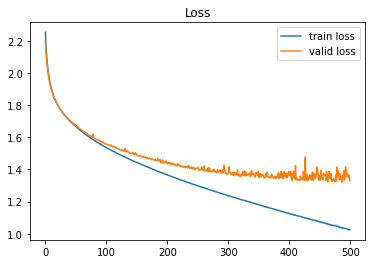

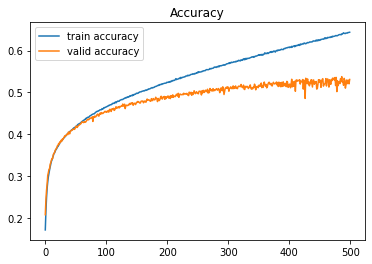

In [8]:
import matplotlib.pyplot as plt
# 以視覺畫方式檢視訓練過程

train_loss = model.history.history["loss"]
valid_loss = model.history.history["val_loss"]

train_acc = model.history.history["accuracy"]
valid_acc = model.history.history["val_accuracy"]

plt.plot(range(len(train_loss)), train_loss, label="train loss")
plt.plot(range(len(valid_loss)), valid_loss, label="valid loss")
plt.legend()
plt.title("Loss")
plt.show()

plt.plot(range(len(train_acc)), train_acc, label="train accuracy")
plt.plot(range(len(valid_acc)), valid_acc, label="valid accuracy")
plt.legend()
plt.title("Accuracy")
plt.show()